In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [187]:
df_kematian = pd.read_csv('E:\ADD\LEARN_Data-Analysis-with-Python/add/angka_kematian.csv', sep=';', usecols=['Kecamatan',
                                                                                                             'Jumlah kelahiran/kematian berdasarkan data SIAK : laki-laki',
                                                                                                             'Jumlah kelahiran/kematian berdasarkan data SIAK : perempuan'])

df_kematian.rename(columns={'Jumlah kelahiran/kematian berdasarkan data SIAK : laki-laki' : 'laki',
                               'Jumlah kelahiran/kematian berdasarkan data SIAK : perempuan' : 'perempuan'}, inplace=True)

df_kematian_melted = pd.melt(df_kematian, id_vars=['Kecamatan'], var_name='jenis_kelamin', value_name='jumlah_kematian')
df_kematian_melted.describe()

,jumlah_kematian
count,62.000000
mean,688.983871
std,362.525589
min,222.000000
25%,441.000000
50%,608.000000
75%,816.250000
max,1866.000000


In [111]:
df_kematian_aggregated = df_kematian_melted.groupby('Kecamatan')['jumlah_kematian'].sum().reset_index()


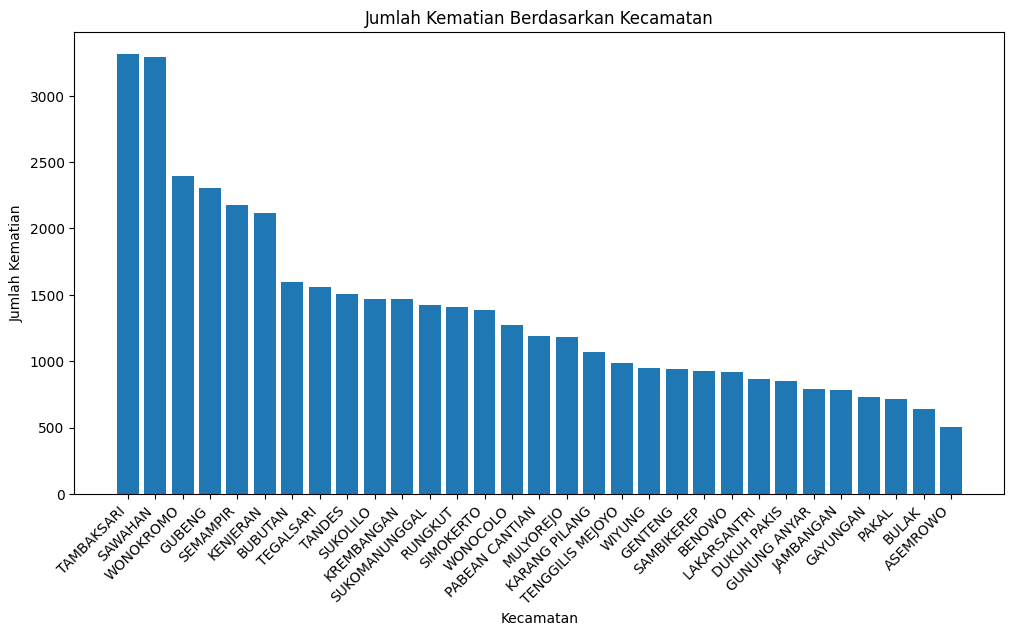

In [144]:
# Sort berdasarkan tingkat kematian secara descending
df_kematian_sorted = df_kematian_aggregated.sort_values(by='jumlah_kematian', ascending=False)

# Visualisasikan tingkat kematian berdasarkan kecamatan
plt.figure(figsize=(12, 6))
plt.bar(df_kematian_sorted['Kecamatan'], df_kematian_sorted['jumlah_kematian'])
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah Kematian')
plt.title('Jumlah Kematian Berdasarkan Kecamatan')
plt.xticks(rotation=45, ha='right')
plt.show()

In [132]:
df_penduduk = pd.read_csv('E:\ADD\LEARN_Data-Analysis-with-Python/add/umur_60.csv', sep=';')
df_penduduk_melted = pd.melt(df_penduduk, id_vars=['Kecamatan'], var_name='usia_jenis_kelamin', value_name='jumlah_penduduk')
df_penduduk_melted[['usia', 'jenis_kelamin']] = df_penduduk_melted['usia_jenis_kelamin'].str.split('_', expand=True)
df_penduduk_melted.drop(columns=['usia_jenis_kelamin'], inplace=True)

df_penduduk_melted

,Kecamatan,jumlah_penduduk,usia,jenis_kelamin
0,ASEMROWO,267,0,laki
1,BENOWO,393,0,laki
2,BUBUTAN,444,0,laki
3,BULAK,223,0,laki
4,DUKUH PAKIS,270,0,laki
...,...,...,...,...
4707,TEGALSARI,1371,75,perempuan
4708,TENGGILIS MEJOYO,618,75,perempuan
4709,WIYUNG,660,75,perempuan
4710,WONOCOLO,902,75,perempuan


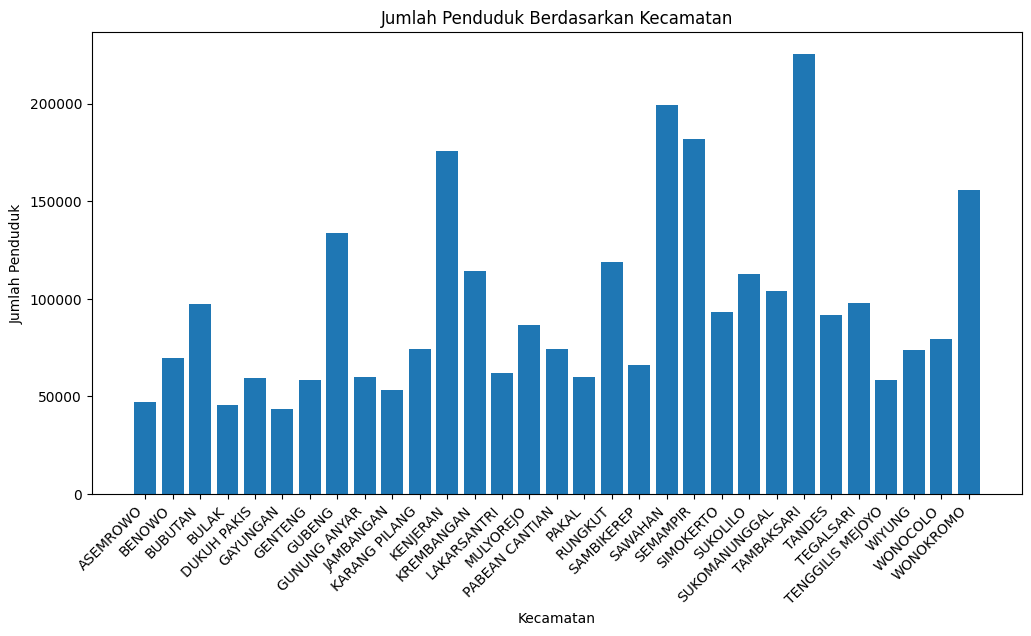

In [133]:
# Agregasi jumlah penduduk berdasarkan kecamatan
df_penduduk_aggregated = df_penduduk_melted.groupby('Kecamatan')['jumlah_penduduk'].sum().reset_index()

# Visualisasikan jumlah penduduk berdasarkan kecamatan
plt.figure(figsize=(12, 6))
plt.bar(df_penduduk_aggregated['Kecamatan'], df_penduduk_aggregated['jumlah_penduduk'])
plt.xlabel('Kecamatan')
plt.ylabel('Jumlah Penduduk')
plt.title('Jumlah Penduduk Berdasarkan Kecamatan')
plt.xticks(rotation=45, ha='right')
plt.show()


In [139]:
df_penduduk_melted['usia'] = pd.to_numeric(df_penduduk_melted['usia'])

# Menghitung rata-rata umur per kecamatan
df_penduduk_melted['usia_tengah'] = df_penduduk_melted['usia'] * df_penduduk_melted['jumlah_penduduk']
df_total = df_penduduk_melted.groupby('Kecamatan').agg({'jumlah_penduduk': 'sum', 'usia_tengah': 'sum'}).reset_index()
df_total['rata_rata_umur'] = df_total['usia_tengah'] / df_total['jumlah_penduduk']

# Menampilkan DataFrame dengan total jumlah orang, total usia tengah, dan rata-rata umur per kecamatan
print(df_total[['Kecamatan', 'jumlah_penduduk', 'usia_tengah', 'rata_rata_umur']])

           Kecamatan  jumlah_penduduk  usia_tengah  rata_rata_umur
0           ASEMROWO            47301      1433624       30.308535
1             BENOWO            69746      2184356       31.318728
2            BUBUTAN            97270      3231718       33.224201
3              BULAK            45772      1439413       31.447457
4        DUKUH PAKIS            59297      1997295       33.682901
5           GAYUNGAN            43371      1459577       33.653294
6            GENTENG            58125      2012361       34.621265
7             GUBENG           133649      4659378       34.862797
8       GUNUNG ANYAR            60034      1960422       32.655195
9          JAMBANGAN            53065      1728810       32.579101
10     KARANG PILANG            74441      2459883       33.044733
11          KENJERAN           175906      5338543       30.348840
12        KREMBANGAN           114029      3715492       32.583746
13       LAKARSANTRI            62127      1991751       32.05

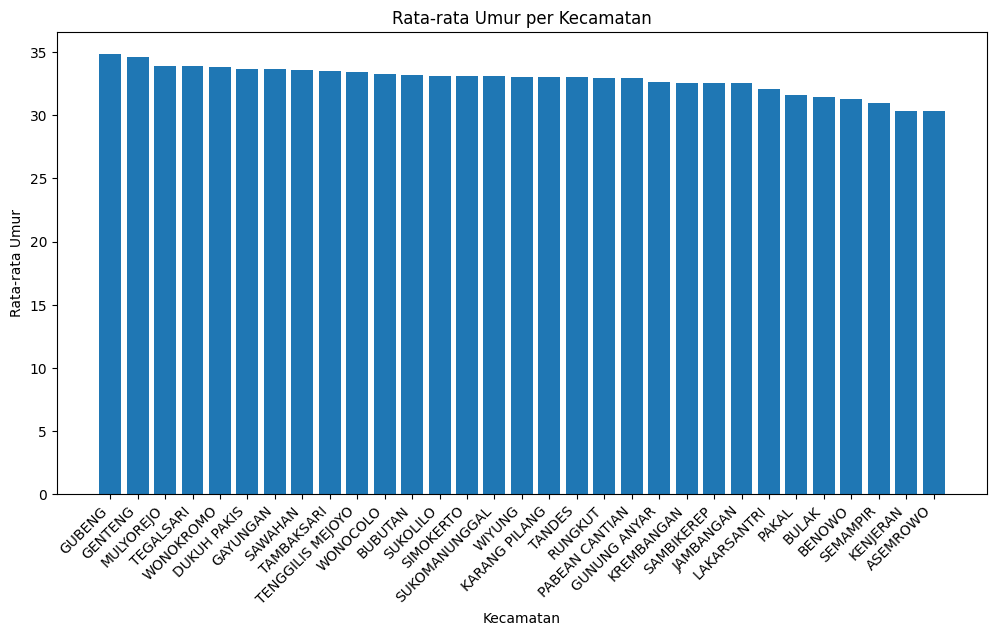

In [147]:
df_total_sorted = df_total.sort_values(by='rata_rata_umur', ascending=False)

# Visualisasikan rata-rata umur per kecamatan
plt.figure(figsize=(12, 6))
plt.bar(df_total_sorted['Kecamatan'], df_total_sorted['rata_rata_umur'])
plt.xlabel('Kecamatan')
plt.ylabel('Rata-rata Umur')
plt.title('Rata-rata Umur per Kecamatan')
plt.xticks(rotation=45, ha='right')
plt.show()


In [156]:
# Gabungkan data jumlah kematian dan rata-rata umur
df_merged = pd.merge(df_kematian_aggregated, df_total, on='Kecamatan')

df_merged.drop(columns=['usia_tengah'], inplace=True)
df_merged

,Kecamatan,jumlah_kematian,jumlah_penduduk,rata_rata_umur
0,ASEMROWO,503,47301,30.308535
1,BENOWO,921,69746,31.318728
2,BUBUTAN,1596,97270,33.224201
3,BULAK,637,45772,31.447457
4,DUKUH PAKIS,849,59297,33.682901
5,GAYUNGAN,730,43371,33.653294
6,GENTENG,942,58125,34.621265
7,GUBENG,2302,133649,34.862797
8,GUNUNG ANYAR,789,60034,32.655195
9,JAMBANGAN,786,53065,32.579101


In [159]:
df_merged['tingkat_kematian'] = (df_merged['jumlah_kematian'] / df_merged['jumlah_penduduk']) * 1000
df_merged



,Kecamatan,jumlah_kematian,jumlah_penduduk,rata_rata_umur,tingkat_kematian
0,ASEMROWO,503,47301,30.308535,10.634025
1,BENOWO,921,69746,31.318728,13.205058
2,BUBUTAN,1596,97270,33.224201,16.407937
3,BULAK,637,45772,31.447457,13.916805
4,DUKUH PAKIS,849,59297,33.682901,14.317756
5,GAYUNGAN,730,43371,33.653294,16.831523
6,GENTENG,942,58125,34.621265,16.206452
7,GUBENG,2302,133649,34.862797,17.224222
8,GUNUNG ANYAR,789,60034,32.655195,13.142553
9,JAMBANGAN,786,53065,32.579101,14.812023


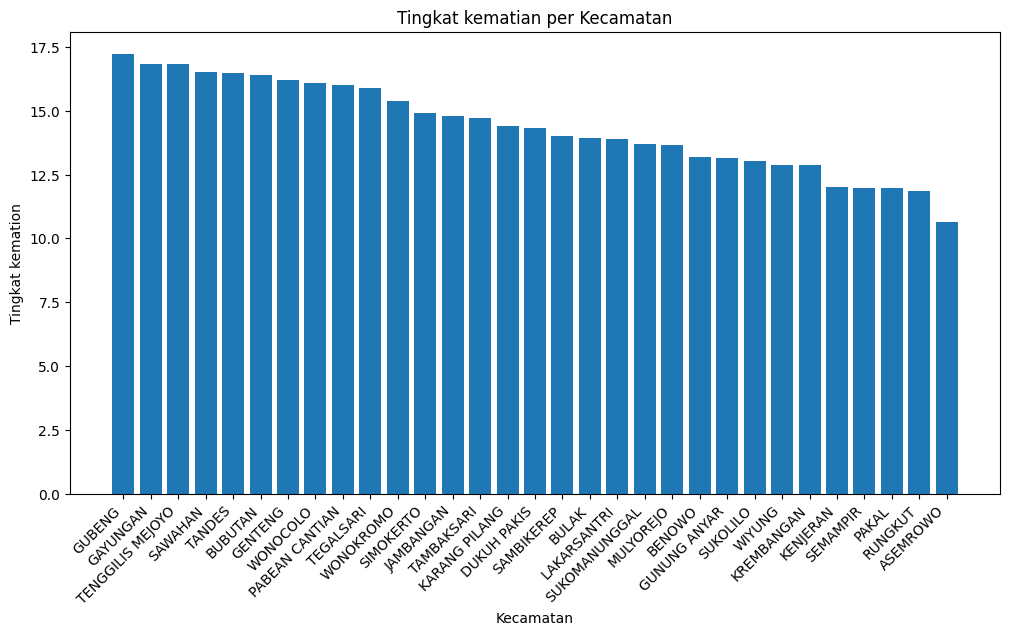

In [163]:
df_merged_sorted = df_merged.sort_values(by='tingkat_kematian', ascending=False)

plt.figure(figsize=(12, 6))
plt.bar(df_merged_sorted['Kecamatan'], df_merged_sorted['tingkat_kematian'])
plt.xlabel('Kecamatan')
plt.ylabel('Tingkat kemation')
plt.title('Tingkat kematian per Kecamatan')
plt.xticks(rotation=45, ha='right')
plt.show()

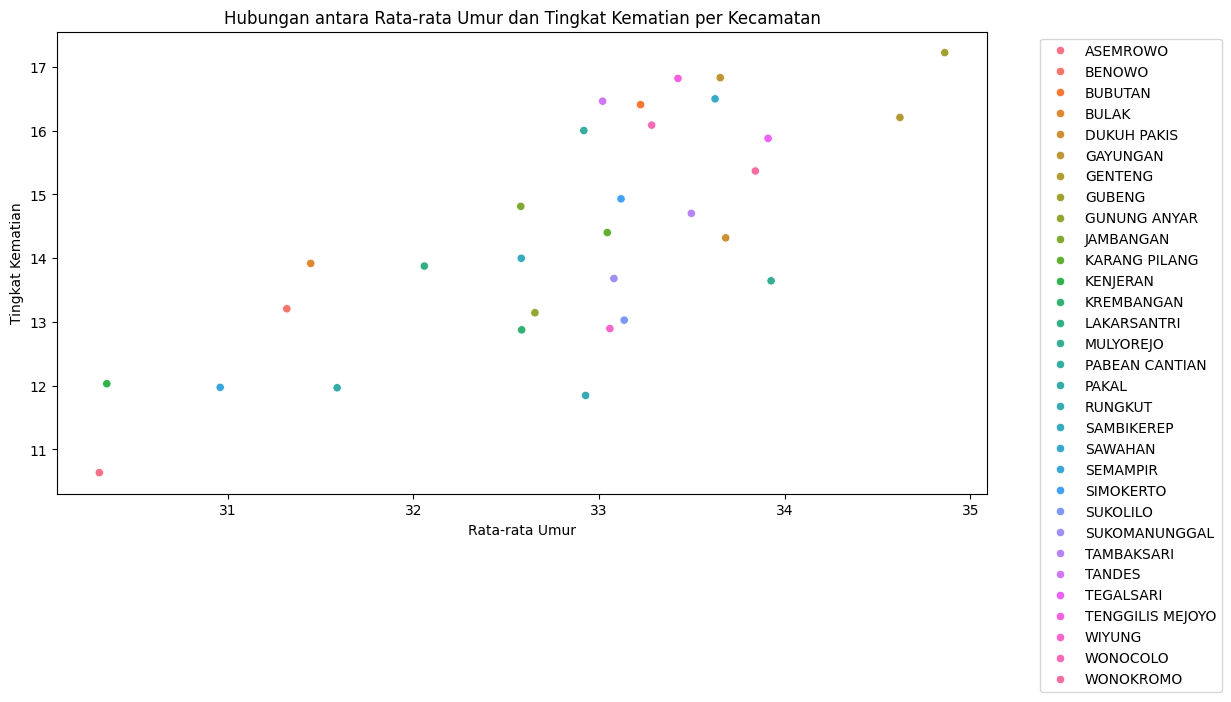

In [175]:
plt.figure(figsize=(12, 6))
scatter_plot = sns.scatterplot(x='rata_rata_umur', y='tingkat_kematian', data=df_merged, hue='Kecamatan')
plt.xlabel('Rata-rata Umur')
plt.ylabel('Tingkat Kematian')
plt.title('Hubungan antara Rata-rata Umur dan Tingkat Kematian per Kecamatan')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')  # Posisi legenda di kanan atas
plt.show()


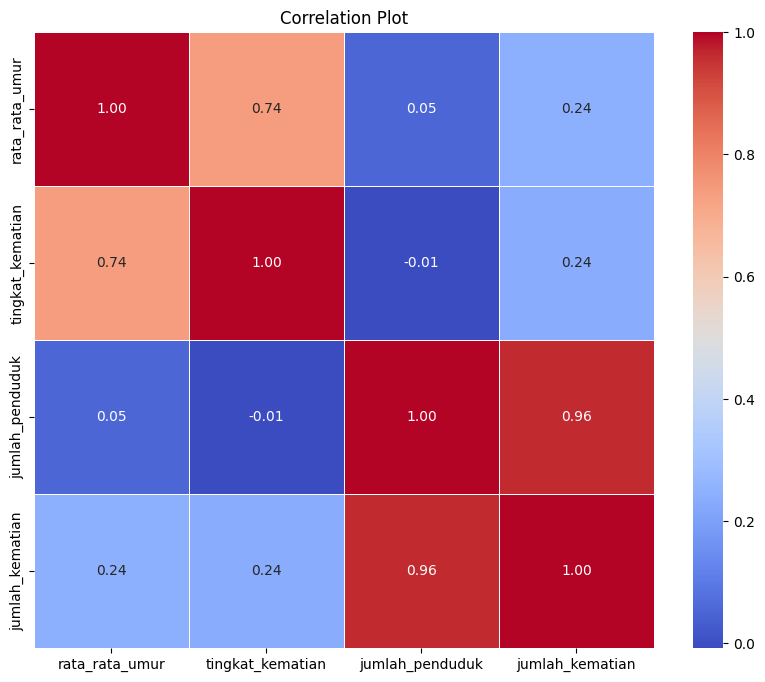

In [176]:
import seaborn as sns
import matplotlib.pyplot as plt

# Misalkan df_merged adalah DataFrame yang berisi data tergabung antara jumlah kematian, rata-rata umur, dan variabel lainnya
# df_merged = ...

# Pilih kolom-kolom yang akan diikutsertakan dalam analisis korelasi
selected_columns = ['rata_rata_umur', 'tingkat_kematian', 'jumlah_penduduk', 'jumlah_kematian']

# Hitung matriks korelasi
correlation_matrix = df_merged[selected_columns].corr()

# Visualisasikan correlation plot
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Plot')
plt.show()

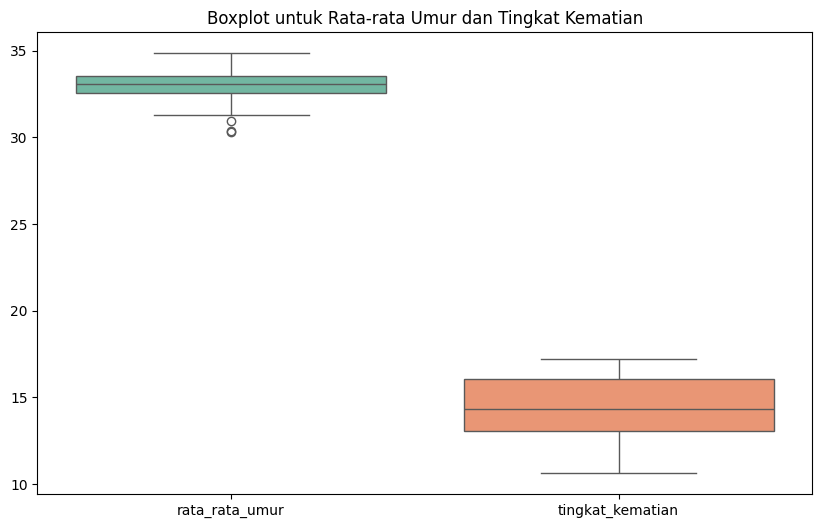

In [177]:
# Pilih kolom yang akan ditampilkan dalam boxplot
selected_columns = ['rata_rata_umur', 'tingkat_kematian']

# Visualisasikan boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(data=df_merged[selected_columns], palette="Set2")
plt.title('Boxplot untuk Rata-rata Umur dan Tingkat Kematian')
plt.show()

In [179]:
# Analisis statistik tingkat kematian
mean_tingkat_kematian = df_merged['tingkat_kematian'].mean()
median_tingkat_kematian = df_merged['tingkat_kematian'].median()
std_tingkat_kematian = df_merged['tingkat_kematian'].std()

# Cetak statistik tingkat kematian
print(f"Rata-rata Tingkat Kematian: {mean_tingkat_kematian:.2f}")
print(f"Median Tingkat Kematian: {median_tingkat_kematian:.2f}")
print(f"Deviasi Standar Tingkat Kematian: {std_tingkat_kematian:.2f}")

# Identifikasi kecamatan dengan tingkat kematian tertinggi dan terendah
kecamatan_tertinggi = df_merged.loc[df_merged['tingkat_kematian'].idxmax(), 'Kecamatan']
kecamatan_terendah = df_merged.loc[df_merged['tingkat_kematian'].idxmin(), 'Kecamatan']

print(f"Kecamatan dengan Tingkat Kematian Tertinggi: {kecamatan_tertinggi}")
print(f"Kecamatan dengan Tingkat Kematian Terendah: {kecamatan_terendah}")


Rata-rata Tingkat Kematian: 14.38
Median Tingkat Kematian: 14.32
Deviasi Standar Tingkat Kematian: 1.77
Kecamatan dengan Tingkat Kematian Tertinggi: GUBENG
Kecamatan dengan Tingkat Kematian Terendah: ASEMROWO


In [ ]:
df_penduduk_melted['usia'] = pd.to_numeric(df_penduduk_melted['usia'])

df_penduduk_melted = df_penduduk_melted[(df_penduduk_melted['usia'] >= 60) & (df_penduduk_melted['usia'] <= 75)]
df_penduduk_melted 

In [109]:
# Menggabungkan kedua dataset berdasarkan kecamatan dan jenis kelamin
df_merged = pd.merge(df_kematian_melted, df_penduduk_melted, on=['Kecamatan', 'jenis_kelamin'])

# Menghitung tingkat kematian
df_merged['tingkat_kematian'] = (df_merged['jumlah_kematian'] / df_merged['jumlah_penduduk']) * 1000

# Tampilkan hasil atau lakukan analisis lebih lanjut
df_merged

,Kecamatan,jenis_kelamin,jumlah_kematian,jumlah_penduduk,usia,tingkat_kematian
0,ASEMROWO,laki,281,267,0,1052.434457
1,ASEMROWO,laki,281,390,1,720.512821
2,ASEMROWO,laki,281,422,2,665.876777
3,ASEMROWO,laki,281,420,3,669.047619
4,ASEMROWO,laki,281,434,4,647.465438
...,...,...,...,...,...,...
4707,WONOKROMO,perempuan,1065,342,71,3114.035088
4708,WONOKROMO,perempuan,1065,332,72,3207.831325
4709,WONOKROMO,perempuan,1065,337,73,3160.237389
4710,WONOKROMO,perempuan,1065,297,74,3585.858586


<function matplotlib.pyplot.title(label: 'str', fontdict: 'dict[str, Any] | None' = None, loc: "Literal['left', 'center', 'right'] | None" = None, pad: 'float | None' = None, *, y: 'float | None' = None, **kwargs) -> 'Text'>

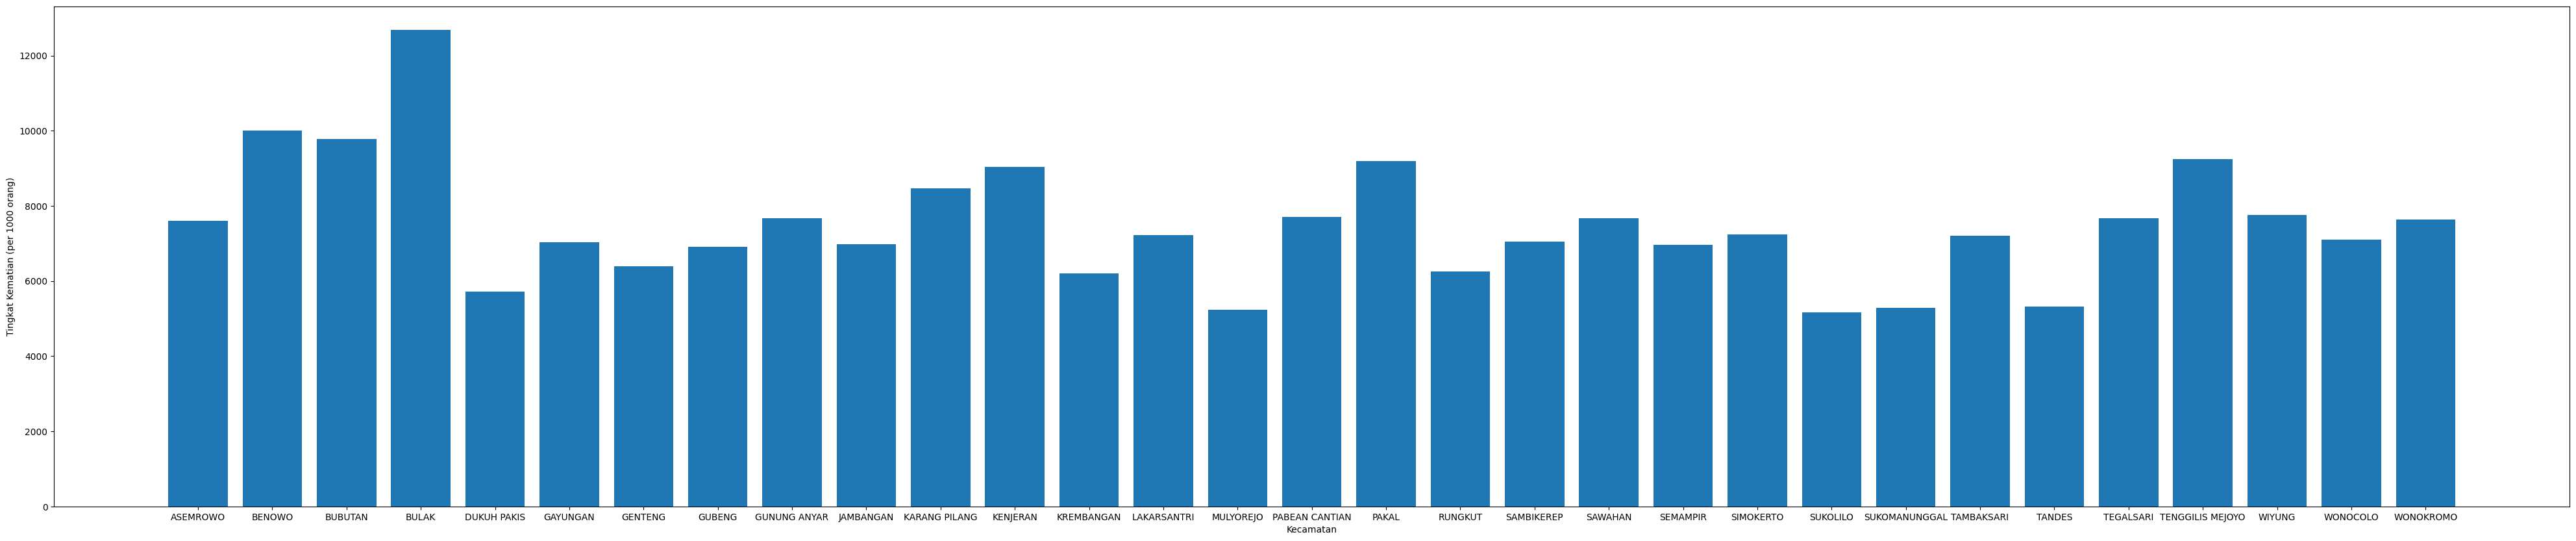

In [89]:
import matplotlib.pyplot as plt

# Visualisasikan tingkat kematian berdasarkan kecamatan
plt.figure(figsize=(50, 10))
plt.bar(df_merged['Kecamatan'], df_merged['tingkat_kematian'])
plt.xlabel('Kecamatan')
plt.ylabel('Tingkat Kematian (per 1000 orang)')
plt.title


In [178]:
import seaborn as sns

# Visualisasikan perbandingan tingkat kematian antara jenis kelamin
plt.figure(figsize=(20, 6))
sns.barplot(x='jenis_kelamin', y='tingkat_kematian', data=df_merged)
plt.xlabel('Jenis Kelamin')
plt.ylabel('Tingkat Kematian (per 1000 orang)')
plt.title('Perbandingan Tingkat Kematian antara Pria dan Wanita')
plt.show()


ValueError: Could not interpret value `jenis_kelamin` for `x`. An entry with this name does not appear in `data`.

<Figure size 2000x600 with 0 Axes>

In [102]:
# Analisis statistik tingkat kematian
mean_tingkat_kematian = df_merged['tingkat_kematian'].mean()
median_tingkat_kematian = df_merged['tingkat_kematian'].median()
std_tingkat_kematian = df_merged['tingkat_kematian'].std()

# Cetak statistik tingkat kematian
print(f"Rata-rata Tingkat Kematian: {mean_tingkat_kematian:.2f}")
print(f"Median Tingkat Kematian: {median_tingkat_kematian:.2f}")
print(f"Deviasi Standar Tingkat Kematian: {std_tingkat_kematian:.2f}")

# Identifikasi kecamatan dengan tingkat kematian tertinggi dan terendah
kecamatan_tertinggi = df_merged.loc[df_merged['tingkat_kematian'].idxmax(), 'Kecamatan']
kecamatan_terendah = df_merged.loc[df_merged['tingkat_kematian'].idxmin(), 'Kecamatan']

print(f"Kecamatan dengan Tingkat Kematian Tertinggi: {kecamatan_tertinggi}")
print(f"Kecamatan dengan Tingkat Kematian Terendah: {kecamatan_terendah}")


Rata-rata Tingkat Kematian: 1371.10
Median Tingkat Kematian: 1033.01
Deviasi Standar Tingkat Kematian: 1058.30
Kecamatan dengan Tingkat Kematian Tertinggi: BULAK
Kecamatan dengan Tingkat Kematian Terendah: GENTENG
